## Traversal of the Space of Cross Validation Folds
The aim is to investigate the effect that changing the number of folds used in cross validation will have on the performance of our model.

In [1]:
# import all modules and functions from traversal_space_cv_folds.py file
import traversal_space_cv_folds as cv_folds

# importing tha matplotlib library
from traversal_space_cv_folds import plt

In [2]:
# Read dataset using pandas
vehicles = cv_folds.pd.read_csv("../../../datasets/vehicles.csv")

In [3]:
vehicles.head()  # print the first five values of the dataset

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
# Logistic Regression model
lr = cv_folds.LogisticRegression(solver="liblinear", multi_class="ovr")

## K-Fold Cross Validation

### How K-Fold CV works
In K-fold cross-validation (CV), we randomly split the training dataset into K folds without replacement, where K−1 folds are used for the model training and the remaining 1 fold is for testing. This procedure is repeated K times so that we obtain K models and K performance estimates. Then we take their average as the final performance estimate. 

### Why we need to do Cross Validation
There is usually a high chance of incurring bias in our model using the method of train_test_split to split the data, because this method assumes that splitting the train and test data will follow the same distribution. Hence, the need for cross validation, as it divides the dataset into a number of folds called, K-Folds, and uses each fold as a testing set at some point.

### What I have done
I have used `cross_val_score` to determine the scores, while using number of splits ranging from 2 to 20. Thereafter I calculated the mean of these scores in order to evaluate the average metric values as shown in the table.

In [7]:
results = cv_folds.traversal(lr, vehicles)
results

,Number of Folds,Average Metric Value
0,2,0.79434
1,3,0.79558
2,4,0.80268
3,5,0.79449
4,6,0.79812
5,7,0.79677
6,8,0.79680
7,9,0.80381
8,10,0.79329
9,11,0.79443


In [8]:
kfolds = results["Number of Folds"]
avg_score = results["Average Metric Value"]

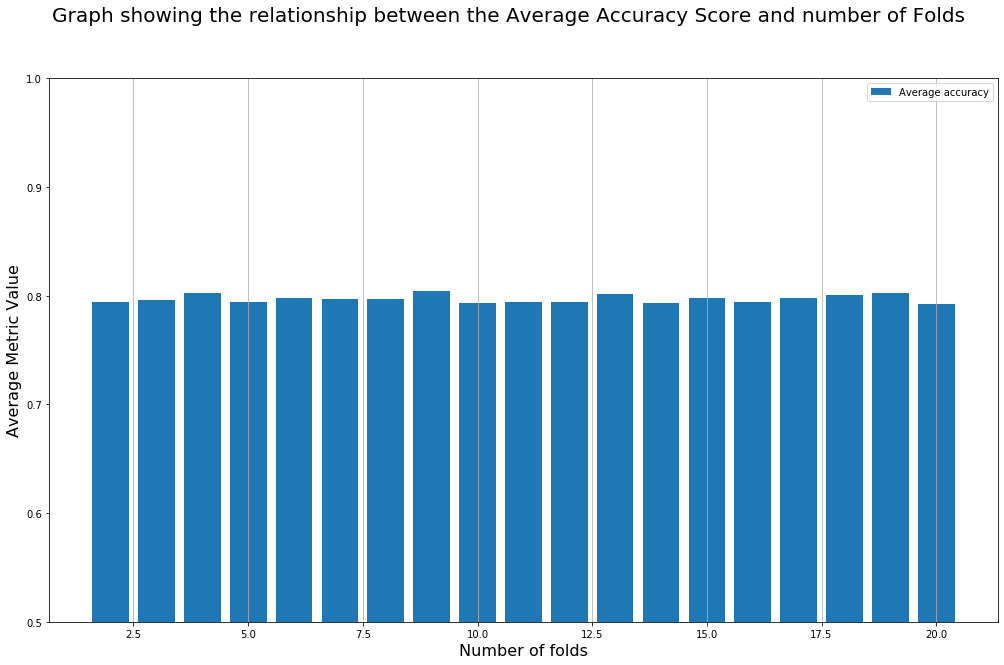

In [9]:
# Visualizing the Average Metric Values against the Number of Folds used in Cross validation
fig = plt.figure(figsize=(17, 10))
plt.bar(kfolds, avg_score, label="Average accuracy")
fig.suptitle(
    "Graph showing the relationship between the \
Average Accuracy Score and number of Folds",
    fontsize=20,
)
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("Number of folds", fontsize=16)
plt.ylabel("Average Metric Value", fontsize=16)
plt.grid(axis="x")
plt.show()

### Inference and Conclusion

A K-Fold value of 9 results in the highest average metric value.

Hence, the number of Folds used should be kept within the range of 5-10 to avoid over-fitting the model.